In [81]:
import numpy as np
import pandas as pd
import csv
filename1 = "res_out_v.txt"

filename2 = "ins_out_v.txt"
 
with open(filename1) as f1:
    res = f1.readlines()
with open(filename2) as f2:
    ins = f2.readlines()

#len_ins, len_res = len(ins),len(res)
len_ins, len_res = 20,25
#print(len_ins, len_res)

def prepros(line):
    line = line[:-1].split(', ')
    new=[0]*24
    flag=0
    for k in line:
        if k.startswith('t='):
            new[0] = k[len('t='):]
        elif k.startswith('hid='):
            new[1] = k[len('hid='):]
        elif k.startswith('uid=') and flag==0:
            new[2] = k[len('uid='):]
            flag=1
        elif k.startswith('pid='):
            new[3] = k[len('pid='):]
        elif k.startswith('sys='):
            new[4] = k[len('sys='):]
        elif k.startswith('dev='):
            new[5] = k[len('dev='):]  
        elif k.startswith('fid='):
            new[6] = k[len('fid='):]  
        elif k.startswith('gfid='):
            new[7] = k[len('gfid='):]
        elif k.startswith('comd='):
            new[8] = k[len('comd='):]  
        elif k.startswith('ofst='):
            new[9] = k[len('ofst='):] 
        elif k.startswith('byts='):
            new[10] = k[len('byts='):]
        elif k.startswith('fd='):
            new[11] = k[len('fd='):]  
        elif k.startswith('fpd='):
            new[12] = k[len('fpd='):] 
        elif k.startswith('cFlg='):
            new[13] = k[len('cFlg='):]
        elif k.startswith('ftyp='):
            new[14] = k[len('ftyp='):]  
        elif k.startswith('fstp='):
            new[15] = k[len('fstp='):]
        elif k.startswith('uid='):
            new[16] = k[len('uid='):]
        elif k.startswith('siz='):
            new[17] = k[len('siz='):]  
        elif k.startswith('nlnk='):
            new[18] = k[len('nlnk='):]  
        elif k.startswith('ctm='):
            new[19] = k[len('ctm='):]
        elif k.startswith('mtm='):
            new[20] = k[len('mtm='):]  
        elif k.startswith('atm='):
            new[21] = k[len('atm='):] 
        elif k.startswith('mode='):
            new[22] = k[len('mode='):]
        else: return 0
    return new

i, j = 0, 0
line_i = prepros(ins[i])
line_j = prepros(res[j])

with open("test.csv","w") as csvfile: 
    writer = csv.writer(csvfile)
    #columns_name
    writer.writerow(["t", "hid","uid","pid","sys","dev","fid","gfid","comd","ofst","byts","fd",
                     "fpd","cFlg","ftyp","fstp","uid","siz","nlnk","ctm","mtm","atm","mode","label"])
    
    while (i<len_ins and j< len_res):    
        if line_i[0]==line_j[0]:
            y = np.random.choice(2,1)[0]            
        elif line_i[0] < line_j[0]:
            y = 0
        else:
            y=1
        if y==0:
            writer.writerow(line_i)
            i+=1
            while i<len_ins and prepros(ins[i])==0:
                i+=1
            if i<len_ins:
                line_i = prepros(ins[i])

        else:
            writer.writerow(line_j)
            j+=1
            while j<len_res and prepros(res[j])==0:
                j+=1
            if j< len_res:
                line_j = prepros(res[j])
                line_j[23]=1 
    if i<len_ins:
        while(i<len_ins):
            writer.writerow(line_i)
            i+=1
            while i<len_ins and  prepros(ins[i])==0:
                i+=1
            if i<len_ins:
                line_i = prepros(ins[i]) 
    elif j<len_res:
        while(j<len_res):
            writer.writerow(line_j)
            j+=1
            while j<len_res and prepros(res[j])==0:
                j+=1
            if j <len_res:
                line_j = prepros(res[j]) 
                line_j[23]=1 


df = pd.read_csv('test.csv')
df.to_csv('out.csv', index=False)

14925076 2117466


In [82]:
print(i,j)


20 26


In [69]:
line=['pid=0', 'dev=9', 'sys=5','fid=-9']
line2=['pid=0', 'dev=9', 'sys=5','fid=-9']
new,new2 = [0]*4,[0]*4
print(new)
for k in line:
    if k.startswith("pid="):
        new[0]=k[4:]
    elif k.startswith("sys="):
        new[1]=k[4:]    
    elif k.startswith("dev="):
        new[2]=k[4:]
    elif k.startswith("fid="):
        new[3]=k[4:]
for k in line2:
    if k.startswith("pid="):
        new2[0]=k[4:]
    elif k.startswith("sys="):
        new2[1]=k[4:]    
    elif k.startswith("dev="):
        new2[2]=k[4:]
    elif k.startswith("fid="):
        new2[3]=k[4:]        
with open("test.csv","w") as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerow(['pid', 'sys', 'dev', 'fid'])
    
    writer.writerows([new,new2])
    #writer.writerows([new2])

[0, 0, 0, 0]


In [73]:
import pandas as pd
df = pd.read_csv('test.csv')
df.to_csv('out.csv', index=False)

In [85]:
import os
import time

def mkSubFile(lines,head,srcName,sub):
    [des_filename, extname] = os.path.splitext(srcName)
    filename  = des_filename + '_' + str(sub) + extname
    print( 'make file: %s' %filename)
    fout = open(filename,'w')
    try:
        fout.writelines([head])
        fout.writelines(lines)
        return sub + 1
    finally:
        fout.close()

def splitByLineCount(filename,count):
    fin = open(filename,'r')
    try:
        head = fin.readline()
        buf = []
        sub = 1
        for line in fin:
            buf.append(line)
            if len(buf) == count:
                sub = mkSubFile(buf,head,filename,sub)
                buf = []
                break
        #if len(buf) != 0:
            #sub = mkSubFile(buf,head,filename,sub)   
    finally:
        fin.close()

if __name__ == '__main__':
    begin = time.time()
    splitByLineCount('out.csv',20)
    end = time.time()
    print('time is %d seconds ' % (end - begin))

make file: out_1.csv
time is 0 seconds 


In [89]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y=[0,0,0,1,1,1]
pca = PCA(n_components=2)
pca.fit(X)
print(pca.get_precision())


print(pca.explained_variance_ratio_)  

print(pca.singular_values_) 

[[  5.          -7.5       ]
 [ -7.5         11.66666667]]
[ 0.99244289  0.00755711]
[ 6.30061232  0.54980396]


In [87]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)                 


print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[ 0.99244289  0.00755711]
[ 6.30061232  0.54980396]


In [88]:
pca = PCA(n_components=1, svd_solver='arpack')
pca.fit(X)


print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[ 0.99244289]
[ 6.30061232]


In [1]:
import numpy as np
a=np.array([1,2,3,4,5,6])
a.reshape((2,3))

array([[1, 2, 3],
       [4, 5, 6]])

In [3]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
y=['cat','dog','cat']
y=enc.fit_transform(y)
print(y)

[0 1 0]


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
file = "out_1.csv"
df = pd.read_csv(file)

In [21]:
'''
dnew = df[["hid","uid","pid","sys","dev","fid","gfid","comd","ofst","byts","fd",
                     "fpd","cFlg","ftyp","fstp","uid","siz","nlnk","ctm","mtm","atm","mode"]]
'''
dnew = df[["sys","uid","pid"]]
dnew.shape

(100000, 3)

C:\Users\Si\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


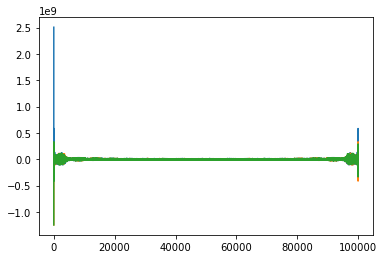

In [22]:
import matplotlib.pyplot as plt
x= np.array(dnew)
transformed=np.fft.fft2(x)
plt.plot(transformed)
plt.show()

In [24]:
df = pd.DataFrame(transformed)
df.to_csv('out_1_tr.csv', index=False)

In [25]:
df.shape

(100000, 3)

In [26]:
from sklearn.metrics import mean_squared_error
import copy
def get_error(ground_truth,signalmat):
    # we want to try every possible signal order
    g=ground_truth.T
    s=signalmat.T
    l = len(s) # number of signals
    
    best_err =mean_squared_error(g,s)
    for j in range(l):        
        temp = copy.deepcopy(s[j])
        for i in range(j,l-1):
            s[i]=copy.deepcopy(s[i+1])
            s[i+1]=copy.deepcopy(temp)

            err = mean_squared_error(g,s)
            if err > best_err:
                best_err = err
    return best_err

def get_ica(fn = 'top10_pids_signal_fiu.csv'):
    
    signal=np.loadtxt(fn,delimiter=',')
    print (signal.shape)
    signal = signal[~(signal==0).all(1)]
    print (signal.shape)
    signal /= signal.std(axis=0) #normalize
    print (time.localtime(),'normalized')
    print (signal.shape)
    nc = len(signal[0])
  
  # Compute ICA
    ica = FastICA(n_components=nc)
    S_ = ica.fit_transform(signal)  # Reconstruct signals

    print (time.localtime(),'ICA calculated')
    ica_err= 1 #get_error(signal,S_)#,np.mean(signal-abs(S_))

    pca = PCA(n_components=nc)
    H = pca.fit_transform(signal)  # Reconstruct signals based on orthogonal components
    print (time.localtime(),'PCA calculated')
    pca_err=1 #get_error(signal,H)

       
    fig=plt.figure()

    models = [signal_,signal, S_,H]
    names = ['Observations (mixed signal)',
           'True Sources',
           'ICA: mse = '+str(ica_err),
           'PCA: mse = '+str(pca_err)]
    colors=cm.rainbow(np.linspace(0,1,nc))

    for ii, (model, name) in enumerate(zip(models, names), 1):
        plt.subplot(4, 1, ii)
        plt.title(name)
        for sig, color in zip(model.T, colors):
            plt.plot(sig, color=color)

    plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
    fig.tight_layout() # show no overlap graph
    plt.show()
    
if __name__=='__main__':
  #get_signal_and_write_to_file(binsize=10000)

    get_ica(fn='out_1_tr.csv')

ValueError: could not convert string to float: b'(2507581320+0j)'